<left>
<table style="margin-top:0px; margin-left:0px;">
<tr>
  <td><img src="https://raw.githubusercontent.com/worm-portal/WORM-Figures/master/style/worm.png" alt="WORM" title="WORM" width=50/></td>
  <td><h1 style=font-size:30px>Animated Activity and Predominance Diagrams Part 2</h1><br />
</tr>
</table>
</left>

This notebook features a few more examples of interactive and animated interactive activity diagrams.

In [1]:
from pychnosz import *
_ = thermo("WORM")

reset: thermodynamic system initialized
The WORM thermodynamic database has been loaded: 1713 aqueous, 1976 total species


Let's plot the H$_2$O-CaO-MgO-SiO$_2$ system at 300 °C and 1000 bar, then animate the same system as a function of temperature.

info_character: found SiO2(aq); also available in cr
info_character: found H2O(liq) [water]; also available in gas
info_character: found O2(aq); also available in gas
info_character: found quartz(cr) with 1 polymorphic transition
affinity: temperature is 300 ºC
affinity: pressure is 1000 bar
affinity: variable 1 is log10(a_Mg+2) at 100 values from 4 to 10
affinity: variable 2 is log10(a_Ca+2) at 100 values from 5 to 15
subcrt: 16 species at 300 ºC and 1000.00 bar (wet) [energy units: J]
subcrt: 2 polymorphs for quartz ... polymorph 1 is stable


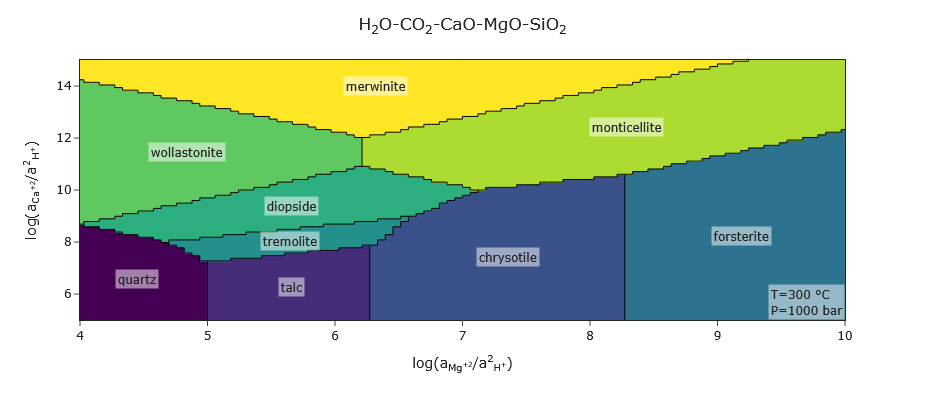

In [2]:
basis(["SiO2", "Ca+2", "Mg+2", "CO2(g)", "H2O", "O2", "H+"])
species(["quartz", "talc", "chrysotile", "forsterite", "tremolite", "diopside", "wollastonite", "monticellite", "merwinite"])
a = affinity(**{"Mg+2" : [4, 10, 100], "Ca+2" : [5, 15, 100], "T" : 300, "P" : 1000})
_ = diagram(a, xlab = ratlab_html("Mg+2"), ylab = ratlab_html("Ca+2"), fill = "viridis", interactive=True, annotation_coords=[1, 0],
            annotation="T=300 °C<br>P=1000 bar",
            main=syslab_html(["H2O", "CO2", "CaO", "MgO", "SiO2"]), width=500, height=400)

Now the animated version that starts at 100 °C and ends at 350 °C:

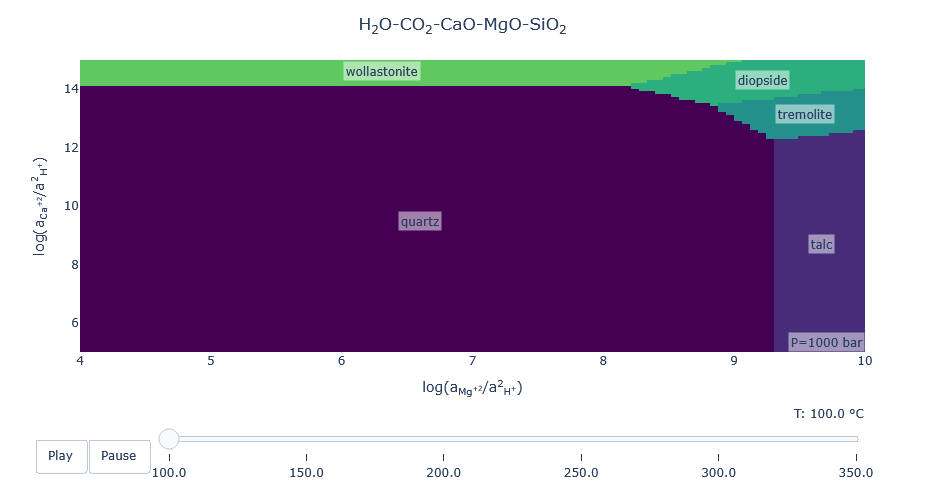

In [3]:
basis_args = {"species": ["SiO2", "Ca+2", "Mg+2", "CO2(g)", "H2O", "O2", "H+"]}
species_args = {"species": ["quartz", "talc", "chrysotile", "forsterite", "tremolite",
                            "diopside", "wollastonite", "monticellite", "merwinite"]}

affinity_args = {"Mg+2" : [4, 10, 100], "Ca+2" : [5, 15, 100], "P" : 1000}
diagram_args = {"width":500, "height":400, "main":syslab_html(["H2O", "CO2", "CaO", "MgO", "SiO2"]),
                "annotation_coords":[1, 0], "annotation":"P=1000 bar",
                "xlab":ratlab_html("Mg+2"), "ylab":ratlab_html("Ca+2")}

animation(
    basis_args=basis_args,
    species_args=species_args,
    affinity_args=affinity_args,
    diagram_args=diagram_args,
    anim_var='T',
    anim_range=[100, 350, 6],
    messages=False,
)

Now animated as a function of pressure

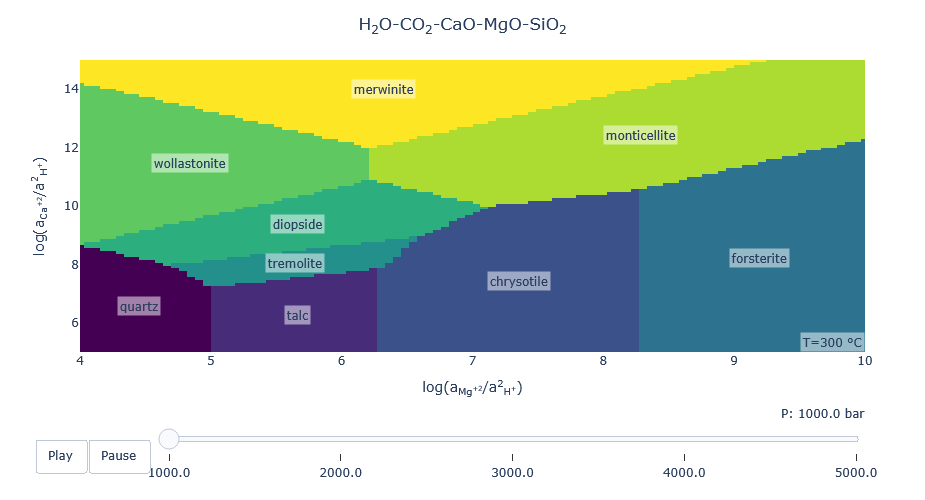

In [4]:
basis_args = {"species": ["SiO2", "Ca+2", "Mg+2", "CO2(g)", "H2O", "O2", "H+"]}
species_args = {"species": ["quartz", "talc", "chrysotile", "forsterite", "tremolite",
                            "diopside", "wollastonite", "monticellite", "merwinite"]}

affinity_args = {"Mg+2" : [4, 10, 100], "Ca+2" : [5, 15, 100], "T" : 300}
diagram_args = {"width":500, "height":400, "main":syslab_html(["H2O", "CO2", "CaO", "MgO", "SiO2"]),
                "annotation_coords":[1, 0], "annotation":"T=300 °C",
                "xlab":ratlab_html("Mg+2"), "ylab":ratlab_html("Ca+2")}

animation(
    basis_args=basis_args,
    species_args=species_args,
    affinity_args=affinity_args,
    diagram_args=diagram_args,
    anim_var='P',
    anim_range=[1000, 5000, 5],
    messages=False,
)

Next, let's make an interactive Eh-pH diagram of the Mn-O-H system at 100 °C. Let's take this one step-by-step because there are a few new things to cover.

As usual, we start by defining our basis species:

In [5]:
basis(["Mn+2", "H2O", "H+", "e-"])

info_character: found H2O(liq) [water]; also available in gas


H   Mn    O    Z  ispecies  logact state
Mn+2  0.0  1.0  0.0  2.0       400     0.0    aq
H2O   2.0  0.0  1.0  0.0         1     0.0   liq
H+    1.0  0.0  0.0  1.0         2     0.0    aq
e-    0.0  0.0  0.0 -1.0         3     0.0    aq

Next we tackle our species of interest.

There are a few new things to be aware of. First, we can use the `retrieve()` to grab all the species in the Mn-O-H system. Secondly, we can control the logarithm of the activities of the species. In the example below, we can assert that the log activities of the aqueous species are all -4.

In [6]:
species(retrieve("Mn", ["O", "H"], state=["aq"]), # grab aqueous species
        state=[-4], # logarithm of the activities
        )

retrieve: updating stoichiometric matrix


Mn+2  H2O   H+   e-  ispecies  logact state    name
0   1.0  4.0 -8.0 -5.0       391    -4.0    aq   MnO4-
1   1.0  0.0  0.0  0.0       400    -4.0    aq    Mn+2
2   1.0  0.0  0.0 -1.0       472    -4.0    aq    Mn+3
3   1.0  4.0 -8.0 -4.0       473    -4.0    aq  MnO4-2
4   1.0  1.0 -1.0  0.0       562    -4.0    aq   MnOH+
5   1.0  1.0 -2.0  0.0       563    -4.0    aq     MnO
6   1.0  2.0 -3.0  0.0       564    -4.0    aq  HMnO2-
7   1.0  2.0 -4.0  0.0       565    -4.0    aq  MnO2-2

Let's also include minerals in our species of interest. Unlike the aqueous species, we want their log activities to be 0 (a safe assumption for minerals).

We can do this with a second call to the `species()` function. Note that the second `species()` function has the parameter `add=True` so that our minerals will be added to our system along with the aqueous species we retrieved.

In [7]:
species(retrieve("Mn", ["O", "H"], state=["cr"]), # grab mineral species
        state=[0], # logarithm of the activities
        add=True, # add these species to the growing list of species to include
        )

Mn+2  H2O   H+   e-  ispecies  logact state         name
0    1.0  4.0 -8.0 -5.0       391    -4.0    aq        MnO4-
1    1.0  0.0  0.0  0.0       400    -4.0    aq         Mn+2
2    1.0  0.0  0.0 -1.0       472    -4.0    aq         Mn+3
3    1.0  4.0 -8.0 -4.0       473    -4.0    aq       MnO4-2
4    1.0  1.0 -1.0  0.0       562    -4.0    aq        MnOH+
5    1.0  1.0 -2.0  0.0       563    -4.0    aq          MnO
6    1.0  2.0 -3.0  0.0       564    -4.0    aq       HMnO2-
7    1.0  2.0 -4.0  0.0       565    -4.0    aq       MnO2-2
8    1.0  1.0 -2.0  0.0       726     0.0    cr  manganosite
9    1.0  2.0 -4.0 -2.0      1885     0.0    cr   pyrolusite
10   2.0  3.0 -6.0 -2.0      1886     0.0    cr     bixbyite
11   3.0  4.0 -8.0 -2.0      1887     0.0    cr  hausmannite
12   1.0  2.0 -2.0  0.0      1894     0.0    cr      Mn(OH)2

In the table above, we now have aqueous and mineral species of interest. Further, we have set the logact values to -4 and 0 for aqueous and mineral species, respectively.

Now we can continue on with `affinity()` and `diagram()` as usual to get our plot:

affinity: temperature is 100 ºC
affinity: pressure is Psat
subcrt: 16 species at 100 ºC and Psat (wet) [energy units: J]


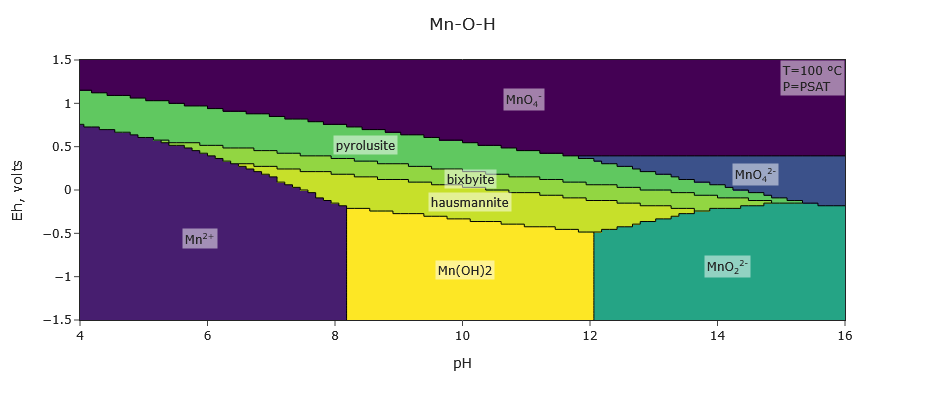

In [8]:
a = affinity(pH=[4, 16, 100], Eh=[-1.5, 1.5, 100], T=100)

_ = diagram(a, width=500, height=400, interactive=True,
            main=syslab_html(["Mn", "O", "H"]), annotation_coords=[1, 1],
            annotation="T=100 °C<br>P=PSAT")

Now let's animate the same thing across temperature.

Note that the `species_args` is now a list of two Python dictionaries this time. This accounts for the two different calls to `species()` we discussed when making the non-animated version of this plot. The first call is to retrieve aqueous species of interest with logact=-4, and the second is to retrieve mineral species with logact=0.

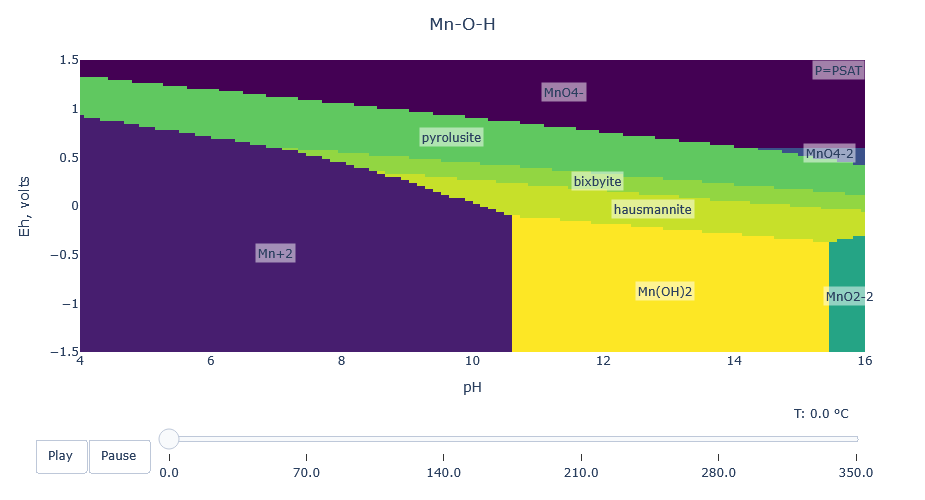

In [9]:
basis_args = {"species": ["Mn+2", "H2O", "H+", "e-"]}

# note that species_args is now a list of two dictionaries
species_args = [{"species": retrieve("Mn", ["O", "H"], state=["aq"]), "state":[-4]},
                {"species": retrieve("Mn", ["O", "H"], state=["cr"]), "state":[0], "add":True}]

affinity_args = {"pH":[4, 16, 100], "Eh":[-1.5, 1.5, 100], "T":100}
diagram_args = {"width":500, "height":400, "main":syslab_html(["Mn", "O", "H"]),
                "annotation_coords":[1, 1], "annotation":"P=PSAT"}

animation(
    basis_args=basis_args,
    species_args=species_args,
    affinity_args=affinity_args,
    diagram_args=diagram_args,
    anim_var='T',
    anim_range=[0, 350, 6],
    messages=False,
)

We now have an animated plot of the Mn-O-H system!

End of demo.